In [62]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [63]:
def load_in_data():
    x_tr = pd.read_csv('x_train.csv')
    y_tr = pd.read_csv('y_train.csv')
    x_cv = pd.read_csv('x_val.csv')
    y_cv = pd.read_csv('y_val.csv')
    x_te = pd.read_csv('x_test.csv')
    y_te = pd.read_csv('y_test.csv')
    return x_tr, y_tr, x_cv, y_cv, x_te, y_te

In [64]:
x_tr, y_tr, x_cv, y_cv, x_te, y_te = load_in_data()

In [65]:
x_tr.fillna(x_tr.mean(), inplace=True)
x_cv.fillna(x_cv.mean(), inplace=True)
x_te.fillna(x_te.mean(), inplace=True)

In [66]:
def plot_learning_curve(estimator, x_tr, y_tr):
    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, x_tr, y_tr, train_sizes = np.linspace(0.2, 1, 20))
    
    plt.plot(train_sizes, -train_scores.mean(1), 'o-', label = str(estimator.__class__.__name__) + ' train')
    plt.plot(train_sizes, -test_scores.mean(1), 'o-', label = str(estimator.__class__.__name__) + ' test')
    plt.legend(loc="best")

In [67]:
def do_stuff(model, x_tr, y_tr, x_cv, y_cv):
    clf = OneVsRestClassifier(model).fit(x_tr, y_tr)
    predict_tr = clf.predict(x_tr).reshape((-1, 1))
    predict_cv = clf.predict(x_cv).reshape((-1, 1))
    print(np.mean(predict_tr == y_tr))
    print(np.mean(predict_cv == y_cv))
    #plot_learning_curve(clf, x_tr, y_tr)
    return clf

In [75]:
def logistic_model(x_tr, y_tr, x_cv, y_cv):
    log = linear_model.LogisticRegression(max_iter = 10000, penalty = 'l2')
    return do_stuff(log, x_tr, y_tr, x_cv, y_cv)

def svm_model(x_tr, y_tr, x_cv, y_cv):
    svc = svm.SVC(kernel = 'poly', max_iter = 10000)
    return do_stuff(svc, x_tr, y_tr, x_cv, y_cv)
    
def rf_model(x_tr, y_tr, x_cv, y_cv):
    rf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
    return do_stuff(rf, x_tr, y_tr, x_cv, y_cv)

In [57]:
logistic_model(x_tr, y_tr, x_cv, y_cv)

0    0.47144
dtype: float64
0    0.493421
dtype: float64


In [76]:
svm_model(x_tr, y_tr, x_cv, y_cv)

c:\users\renzh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\users\renzh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\users\renzh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0    0.379403
dtype: float64
0    0.36102
dtype: float64


OneVsRestClassifier(estimator=SVC(kernel='poly', max_iter=10000))

In [54]:
rf_model(x_tr, y_tr, x_cv, y_cv)

0    0.460792
dtype: float64
0    0.456414
dtype: float64


In [69]:
clf = logistic_model(x_tr, y_tr, x_cv, y_cv)
predict_te = clf.predict(x_te).reshape((-1, 1))
np.mean(predict_te == y_te)

0    0.47144
dtype: float64
0    0.493421
dtype: float64


0    0.476974
dtype: float64

In [71]:
df = pd.read_csv('Match.csv')
goal_dif = df['home_team_goal'].sub(df['away_team_goal'])
goal_dif[goal_dif < 0] = -1
goal_dif[goal_dif > 0] = 1
wins = goal_dif == 1
ties = goal_dif == 0
losses = goal_dif == -1
print(np.mean(wins))
print(np.mean(ties))
print(np.mean(losses))

0.4586991298919193
0.2540091302821023
0.2872917398259784


In [78]:
# Let's find prec, recall
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [87]:
Y_cv = label_binarize(y_cv, classes=[1, 0, -1])
clf = logistic_model(x_tr, y_tr, x_cv, y_cv)
predict_cv = clf.decision_function(x_cv)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(-1, 2):
    precision[i], recall[i], _ = precision_recall_curve(Y_cv[:, i],
                                                        predict_cv[:, i])
    average_precision[i] = average_precision_score(Y_cv[:, i], predict_cv[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(Y_cv.ravel(),
    predict_cv.ravel())
average_precision["micro"] = average_precision_score(Y_cv, predict_cv,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
print(precision)
print(recall)

0    0.47144
dtype: float64
0    0.493421
dtype: float64
Average precision score, micro-averaged over all classes: 0.27
{-1: array([0.28782895, 0.2872428 , 0.28747941, 0.2853598 , 0.28500414,
       0.28595179, 0.2847627 , 0.28356964, 0.28297162, 0.2826087 ,
       0.28284519, 0.28224456, 0.28164292, 0.28187919, 0.28127624,
       0.28006728, 0.27946128, 0.27932489, 0.27895182, 0.27834179,
       0.2779661 , 0.27735369, 0.27674024, 0.27636054, 0.27659574,
       0.27621483, 0.27521368, 0.2739726 , 0.27420737, 0.27405498,
       0.27390181, 0.27413793, 0.27312014, 0.27186147, 0.2712305 ,
       0.27059844, 0.27106864, 0.27067015, 0.27027027, 0.27074236,
       0.26970228, 0.26906223, 0.26953468, 0.26977153, 0.26912929,
       0.26848592, 0.26872247, 0.26895944, 0.26831421, 0.26766784,
       0.26790451, 0.26749336, 0.26684397, 0.26755556, 0.26779359,
       0.2663092 , 0.26499552, 0.26547085, 0.26415094, 0.26438849,
       0.26462646, 0.26420198, 0.26444043, 0.26467931, 0.26401447,
    

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.27')

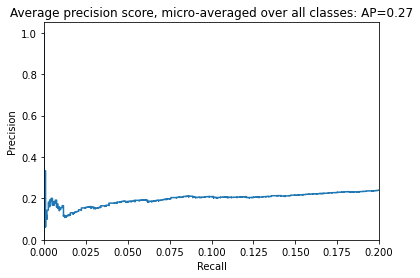

In [89]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 0.2])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))